# Cap 1: Grafos e redes

In [1]:
# importa networkx
import networkx as nx

# importa matplotlib
import matplotlib.pyplot as plt

# import pandas
import pandas as pd

## 1.3 Métricas Globais de Redes

### 1.3.1 Densidade

Seja uma rede $G=(V,E)$, com $|V|=n$ e $|E|=m$. 

Então, a densidade da rede, $\mathrm{dens}(G)$, é 
- igual a $\dfrac{2m}{n(n-1)}$, se a rede for não direcionada, e 
- igual a $\dfrac{m}{n(n-1)}$ se a rede for direcionada.

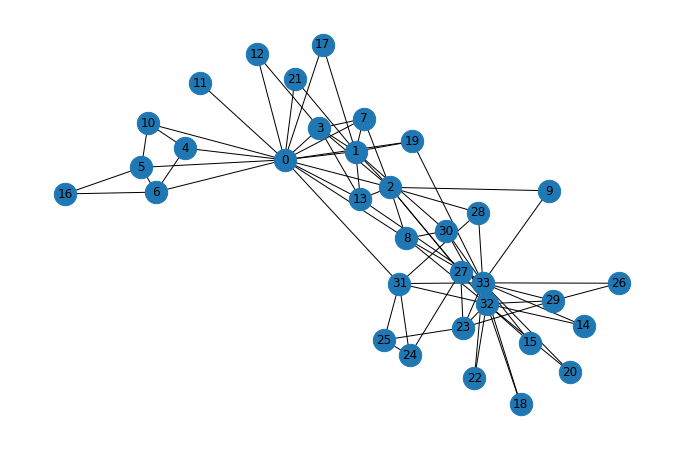

In [2]:
# grafo do clube do karate
karate = nx.karate_club_graph()

# cria uma figura e um conjunto de subplots
fig, ax = plt.subplots(figsize=(12,8))

# imprime o grafo g (karate club)
nx.draw(karate, node_size=500, with_labels = True)

# mostra as figuras 
plt.show()

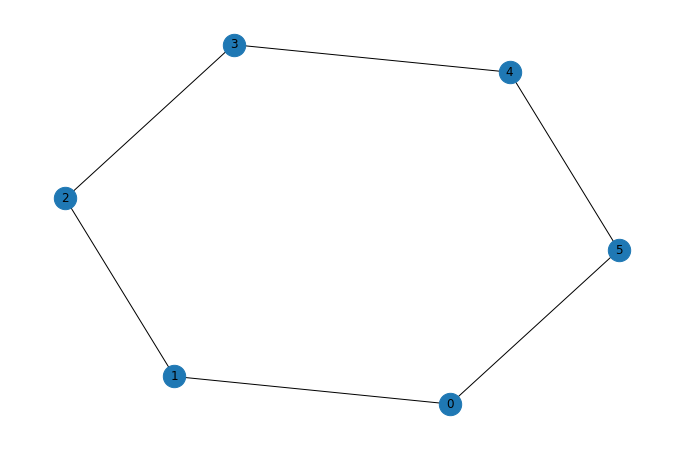

In [3]:
# círculo com 6 nós
gci = nx.circulant_graph(6 ,[1])

# cria uma figura e um conjunto de subplots
fig, ax = plt.subplots(figsize=(12,8))

# imprime o grafo
nx.draw(gci, node_size=500, with_labels = True)

plt.show()

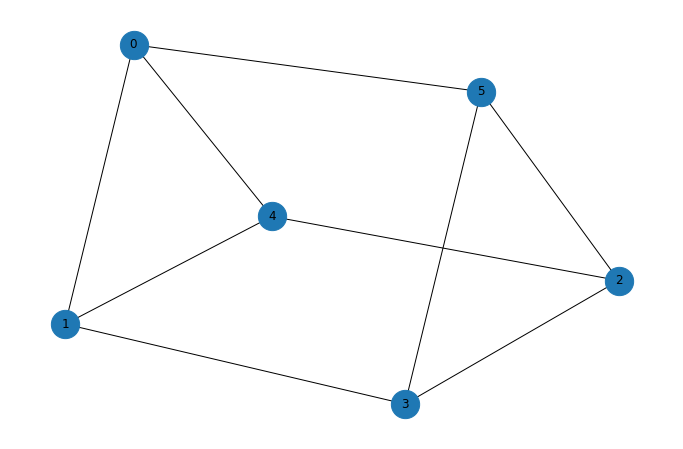

In [4]:
# grafo regular com 6 nós e 3 arestas por nó
gre = nx.random_regular_graph(3,6)

fig, ax = plt.subplots(1,1,figsize=(12,8))

# gera um grafo regular com 6 nós e 3 arestas por nó
gre = nx.random_regular_graph(3, 6)

# grafico do grafo gre
nx.draw(gre, node_size=800, with_labels = True)

plt.show()

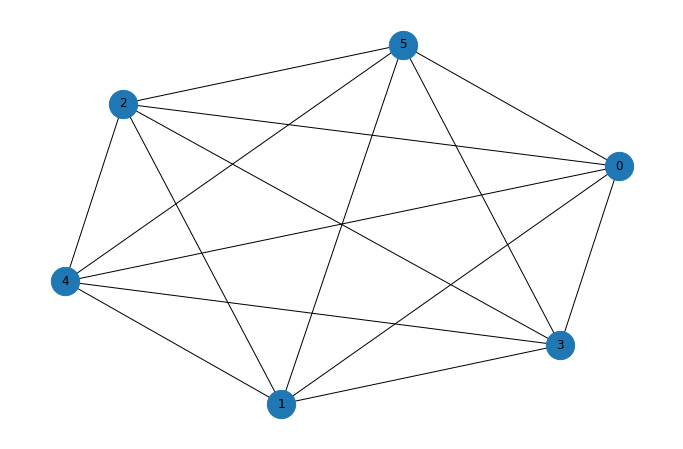

In [5]:
# grafo completo com 6 nós
gco = nx.complete_graph(6)

# creates a figure and a grid of subplots
fig, ax = plt.subplots(1,1,figsize=(12,8))

# gera um grafo completo com 6 nós
gco = nx.complete_graph(6)

# grafico do grafo gco
nx.draw(gco, node_size=800, with_labels = True)

plt.show()

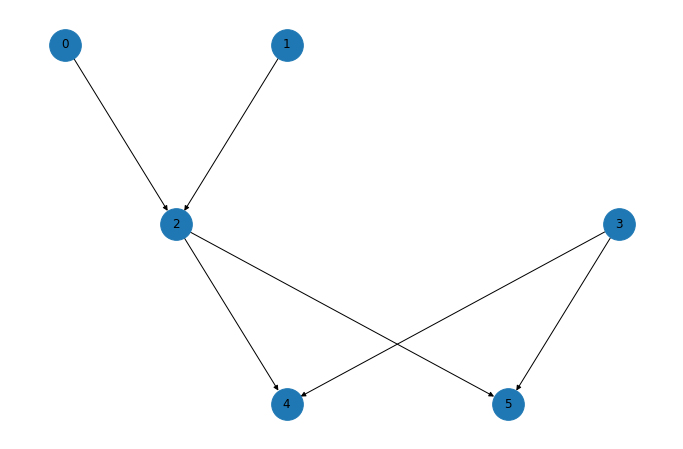

In [7]:
fig, ax = plt.subplots(1,1,figsize=(12,8))

# gera um grafo direcionado gfa
GFA = nx.DiGraph()

# adcionar nós ao grafo gfa
GFA.add_nodes_from([0,1,2,3,4,5])

# adicionar arestas ao grafo gfa
GFA.add_edge(0,2) 
GFA.add_edge(1,2) 
GFA.add_edge(2,4) 
GFA.add_edge(2,5) 
GFA.add_edge(3,4) 
GFA.add_edge(3,5) 

# definindo a posição dos nos
pos = {} 
pos[0] = [-1,0]
pos[1] = [0,0]
pos[2] = [-0.5,-0.5]
pos[3] = [1.5,-0.5]
pos[4] = [0.0,-1.0]
pos[5] = [1.0,-1.0]

# grafico do grafo gfa
nx.draw(GFA, pos=pos, node_size=1000, with_labels=True, arrows=True)

plt.show()

In [8]:
# imprime a densidade do grafo g (karate club)
print(f"dens(karate) = {nx.density(karate)}")

dens(karate) = 0.13903743315508021


In [9]:
# imprime a densidade do grafo gre (grafo regular com 6 nós e 3 arestas por nó)
print(f"dens(gre) = {nx.density(gre)}")

dens(gre) = 0.6


In [10]:
# imprime a densidade do grafo gco (grafo completo com 6 nós)
print(f"dens(gco) = {nx.density(gco)}")

dens(gco) = 1.0


### 1.3.2 Comprimento médio e caminho

**Diâmetro**: maior distância geodésica(shortest path) entre dois nós em uma mesma componente.

**Comprimento médio dos caminhos**: média de todas as distâncias geodésicas entre dois nós que são conectados na rede.

In [10]:
for path in nx.all_simple_paths(karate, source=0, target=3, cutoff=3):
    print(path)

[0, 1, 2, 3]
[0, 1, 3]
[0, 1, 7, 3]
[0, 1, 13, 3]
[0, 2, 1, 3]
[0, 2, 3]
[0, 2, 7, 3]
[0, 2, 13, 3]
[0, 3]
[0, 7, 1, 3]
[0, 7, 2, 3]
[0, 7, 3]
[0, 8, 2, 3]
[0, 12, 3]
[0, 13, 1, 3]
[0, 13, 2, 3]
[0, 13, 3]
[0, 17, 1, 3]
[0, 19, 1, 3]
[0, 21, 1, 3]


In [11]:
paths = nx.all_simple_paths(karate, source=0, target=3, cutoff=5)
for path in map(nx.utils.pairwise, paths):
    print(list(path))

[(0, 1), (1, 2), (2, 3)]
[(0, 1), (1, 2), (2, 7), (7, 3)]
[(0, 1), (1, 2), (2, 13), (13, 3)]
[(0, 1), (1, 3)]
[(0, 1), (1, 7), (7, 2), (2, 3)]
[(0, 1), (1, 7), (7, 2), (2, 13), (13, 3)]
[(0, 1), (1, 7), (7, 3)]
[(0, 1), (1, 13), (13, 2), (2, 3)]
[(0, 1), (1, 13), (13, 2), (2, 7), (7, 3)]
[(0, 1), (1, 13), (13, 3)]
[(0, 1), (1, 19), (19, 33), (33, 13), (13, 3)]
[(0, 1), (1, 30), (30, 8), (8, 2), (2, 3)]
[(0, 1), (1, 30), (30, 32), (32, 2), (2, 3)]
[(0, 1), (1, 30), (30, 33), (33, 13), (13, 3)]
[(0, 2), (2, 1), (1, 3)]
[(0, 2), (2, 1), (1, 7), (7, 3)]
[(0, 2), (2, 1), (1, 13), (13, 3)]
[(0, 2), (2, 3)]
[(0, 2), (2, 7), (7, 1), (1, 3)]
[(0, 2), (2, 7), (7, 1), (1, 13), (13, 3)]
[(0, 2), (2, 7), (7, 3)]
[(0, 2), (2, 8), (8, 30), (30, 1), (1, 3)]
[(0, 2), (2, 8), (8, 33), (33, 13), (13, 3)]
[(0, 2), (2, 9), (9, 33), (33, 13), (13, 3)]
[(0, 2), (2, 13), (13, 1), (1, 3)]
[(0, 2), (2, 13), (13, 1), (1, 7), (7, 3)]
[(0, 2), (2, 13), (13, 3)]
[(0, 2), (2, 27), (27, 33), (33, 13), (13, 3)]
[(0, 2

In [12]:
# imprime o shortest path de 3 a 20 do grafo karate club
print(f"caminho de 3 a 20 = {nx.shortest_path(karate, 3, 20)}")

caminho de 3 a 20 = [3, 2, 32, 20]


In [13]:
# imprime o tamanho do shortest path de 3 a 20 do grafo karate club
print(f"tamanho do caminho de 3 a 20 = {nx.shortest_path_length(karate,3,20)}")

tamanho do caminho de 3 a 20 = 3


In [14]:
# calcula o comprimento médio dos caminhos geodesicos de g (karate club)
print(f"comprimento médio de g = {nx.average_shortest_path_length(karate)}")

comprimento médio de g = 2.408199643493761


In [15]:
# imprime o diâmetro de g (karate club)
print(f"diâmetro de g = {nx.diameter(karate)}")

diâmetro de g = 5


### 1.3.3 Distribuição de graus

- O grau de um certo vértice de uma rede não direcionada consiste de quantas arestas envolvem este vértice na
rede, ou seja, 
$$d(i) = \displaystyle\sum_{j \in V} A(i,j)$$

- Vértices com alto grau são aqueles que conseguem acessar imediatamente um grande número de vértices.

- Em redes direcionadas, existem dois tipos de grau que dependem da direção das arestas: o grau de saída (out-degree), $d^{out}(i)$, e o grau de entrada (in-degree), $d^{in}(i)$.
$$
d^{out}(i) = \displaystyle\sum_{j \in V} A(i,j)

\text{ e }

d^{in}(i) = \displaystyle\sum_{j \in V} A(j,i)
$$




In [16]:
# imprime o grau do nó 0 do grafo g (karate club)
print(f"grau do nó 0: {karate.degree(0)}")

grau do nó 0: 16


In [17]:
# imprime lista com o grau dos nós 0, 1 e 2 do grafo g(karate club)
print(f"graus dos nós 0, 1 e 2: {list(karate.degree([0,1,2]))}")

graus dos nós 0, 1 e 2: [(0, 16), (1, 9), (2, 10)]


In [18]:
# imprime lista com as frequências de ocorrência de graus: #grau0, #grau1, etc
print(f"frequências de ocorrência dos graus: {nx.degree_histogram(karate)}")

frequências de ocorrência dos graus: [0, 1, 11, 6, 6, 3, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1]


In [19]:
for i in GFA.nodes():
    print(f"in degree node {i}: {GFA.in_degree(i)}")

in degree node 0: 0
in degree node 1: 0
in degree node 2: 2
in degree node 3: 0
in degree node 4: 2
in degree node 5: 2


In [20]:
for i in GFA.nodes():
    print(f"in degree node {i}: {GFA.out_degree(i)}")

in degree node 0: 1
in degree node 1: 1
in degree node 2: 2
in degree node 3: 2
in degree node 4: 0
in degree node 5: 0


### 1.3.4 Coesão e agrupamento

Redes complexas possuem uma característica de coesão em que nós vizinhos a um certo nó tem uma maior chance de serem vizinhos entre si.

Existem algumas formas de mensurar essa característica, por exemplo, através do conceito de cliques.

Uma **clique** em um grafo não-direcionado é um conjunto de vértices dois a dois adjacentes. 

Em outras palavras, um conjunto C de vértices é uma clique se tiver a seguinte propriedade: 
para todo par (v, w) de vértices distintos em C, existe uma aresta com pontas v e w.

**Exemplo:** Para qualquer vértice v, o conjunto {v} é uma clique. 

**Exemplo:** Se o grafo tem alguma aresta com pontas v e w então o conjunto {v,w} é uma clique.

Uma clique C é maximal se não existe clique C' que seja subconjunto próprio de C. 

Uma clique C é máxima se não existe clique C' que seja maior que C. 

Uma maneira de analisar a coesão de uma rede seria analisar a distribuição dos cliques, ou seja, quantas cliques de cada tamanho existem no grafo.

Cliques são muito sensíveis a remoção de um nó, assim outras medidas foram propostas para analisar o grau de coesão ou agrupamento da rede. 

O **coeficiente de agrupamento total** é dado pela proporção de vezes que dois vértices j e k que são vizinhos de um mesmo vértice i também são vizinhos entre si

$$
cl(G)=
\dfrac{\sum\limits_{(i,j,k):j\ne i,k\ne i,k\ne j}A(i,j)A(i,k)A(j,k)}{\displaystyle\sum\limits_{(i,j,k):j\ne i,k\ne i,k\ne j}A(i,j)A(i,k)}
$$


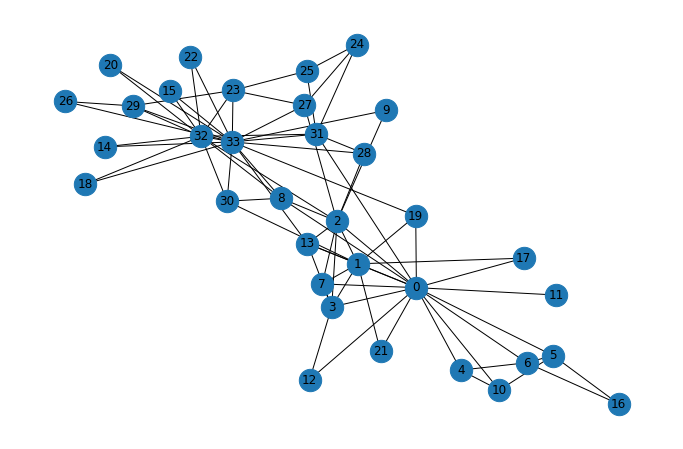

In [21]:
# grafo do clube do karate
karate = nx.karate_club_graph()

# cria uma figura e um conjunto de subplots
fig, ax = plt.subplots(figsize=(12,8))

# imprime o grafo g (karate club)
nx.draw(karate, node_size=500, with_labels = True)

# mostra as figuras 
plt.show()

In [22]:
clqs = nx.enumerate_all_cliques(karate) # iterator com todos as cliques

list_clqs = []
for i in clqs:
    list_clqs.append(i)

list_clqs

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [0, 5],
 [0, 6],
 [0, 7],
 [0, 8],
 [0, 10],
 [0, 11],
 [0, 12],
 [0, 13],
 [0, 17],
 [0, 19],
 [0, 21],
 [0, 31],
 [1, 2],
 [1, 3],
 [1, 7],
 [1, 13],
 [1, 17],
 [1, 19],
 [1, 21],
 [1, 30],
 [2, 3],
 [2, 7],
 [2, 8],
 [2, 9],
 [2, 13],
 [2, 27],
 [2, 28],
 [2, 32],
 [3, 7],
 [3, 12],
 [3, 13],
 [4, 6],
 [4, 10],
 [5, 6],
 [5, 10],
 [5, 16],
 [6, 16],
 [8, 30],
 [8, 32],
 [8, 33],
 [9, 33],
 [13, 33],
 [14, 32],
 [14, 33],
 [15, 32],
 [15, 33],
 [18, 32],
 [18, 33],
 [19, 33],
 [20, 32],
 [20, 33],
 [22, 32],
 [22, 33],
 [23, 25],
 [23, 27],
 [23, 29],
 [23, 32],
 [23, 33],
 [24, 25],
 [24, 27],
 [24, 31],
 [25, 31],
 [26, 29],
 [26, 33],
 [27, 33],
 [28, 31],
 [28, 33],
 [29, 32],
 [29, 33],
 [30, 32],
 [30, 33],
 [31, 32],

In [23]:
list_tam_clqs = []
for i in list_clqs:
    list_tam_clqs.append(len(i))

list_tam_clqs

df_tam_clqs = pd.DataFrame(list_tam_clqs)
df_tam_clqs.value_counts()

0
2    78
3    45
1    34
4    11
5     2
Name: count, dtype: int64

In [24]:
clqs_max = nx.find_cliques(karate) # iterator com todos os cliques maximais

list_clqs_max = []
for i in clqs_max:
    list_clqs_max.append(i)

list_clqs_max

[[0, 1, 17],
 [0, 1, 2, 3, 13],
 [0, 1, 2, 3, 7],
 [0, 1, 19],
 [0, 1, 21],
 [0, 4, 10],
 [0, 4, 6],
 [0, 5, 10],
 [0, 5, 6],
 [0, 8, 2],
 [0, 11],
 [0, 12, 3],
 [0, 31],
 [1, 30],
 [2, 32, 8],
 [2, 9],
 [2, 27],
 [2, 28],
 [5, 16, 6],
 [33, 32, 8, 30],
 [33, 32, 14],
 [33, 32, 15],
 [33, 32, 18],
 [33, 32, 20],
 [33, 32, 22],
 [33, 32, 23, 29],
 [33, 32, 31],
 [33, 9],
 [33, 13],
 [33, 19],
 [33, 26, 29],
 [33, 27, 23],
 [33, 28, 31],
 [24, 25, 31],
 [24, 27],
 [25, 23]]

In [25]:
list_tam_clqs_max = []
for i in list_clqs_max:
    list_tam_clqs_max.append(len(i))

df_freq_tam_clqs_max = pd.DataFrame(list_tam_clqs_max)
df_freq_tam_clqs_max.value_counts()

0
3    21
2    11
4     2
5     2
Name: count, dtype: int64

In [26]:
# find the maximum clique
nx.approximation.max_clique(karate)

{0, 1, 2, 3, 7}

In [27]:
for i in list_clqs_max:
    if len(i) == 5:
        print(i)

[0, 1, 2, 3, 13]
[0, 1, 2, 3, 7]


In [28]:
# calculo do tamanho médio dos cliques
iter_clqs = nx.enumerate_all_cliques(karate)

list_clqs = []
for i in iter_clqs:
    list_clqs.append(i)

soma = 0
k = len(list_clqs)
for i in list_clqs :
    soma = soma + len(i)
lonmedia = soma / k

print(f"Tamanho médio das cliques: {lonmedia}")

Tamanho médio das cliques: 2.2294117647058824


In [29]:
# imprime o coeficiente de agrupamento total(cl) do grafo g (karate club) 
print(f"cl(g) = {nx.transitivity(karate)}")

cl(g) = 0.2556818181818182


In [30]:
# imprime o cl do grafo gci () 
print(f"cl(gci) = {nx.transitivity(gci)}")

cl(gci) = 0


In [31]:
# imprime o cl do grafo gre () 
print(f"cl(gre) = {nx.transitivity(gre)}")

cl(gre) = 0.3333333333333333


In [32]:
# imprime o cl do grafo gco () 
print(f"cl(gco) = {nx.transitivity(gco)}")

cl(gco) = 1.0


### 1.3.5 Reciprocidade

Em redes direcionadas, uma medida de interesse é saber qual a fração de arestas que ocorrem em ambas as direções.

**Reciprocidade**: fração de arestas que ocorrem em ambas as direções.

Fórmula para o cálculo da reciprocidade:
$$
rc(G)=
\dfrac{\displaystyle\sum\limits_{i,j}A(i,j)A(j,i)}{\displaystyle\sum\limits_{i,j}A(i,j)}.
$$

In [33]:
# gerando o grafo direcionado GD
GD = nx.DiGraph ()
GD.add_nodes_from([1,2,3])
GD.add_edges_from([(1,2),(2,1),(2,3),(3,1)])

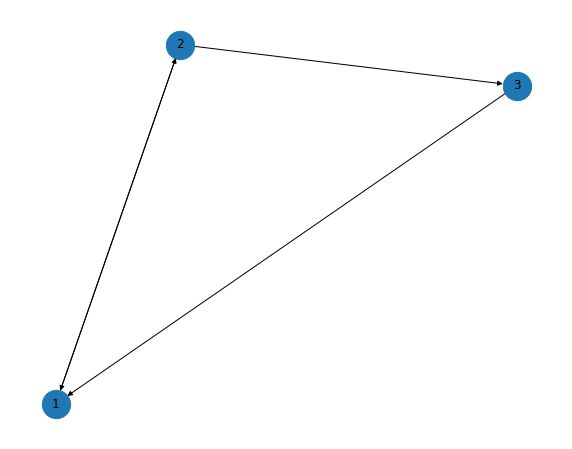

In [34]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

# grafico do grafo gdi
nx.draw(GD, node_size=800, with_labels = True)

plt.show()

In [35]:
# imprime a reciprocidade de GD
print(f"re(GD) = {nx.reciprocity(GD)}")

re(GD) = 0.5


In [36]:
#A = nx.adjacency_matrix(GD)
A = nx.to_scipy_sparse_array(GD).toarray()
A

array([[0, 1, 0],
       [1, 0, 1],
       [1, 0, 0]])

In [39]:
num_rows, num_cols = A.shape

In [44]:
for i in range(num_rows):
    for j in range(num_cols):
        print(f"({i},{j}) : {A[i,j]}")

(0,0) : 0
(0,1) : 1
(0,2) : 0
(1,0) : 1
(1,1) : 0
(1,2) : 1
(2,0) : 1
(2,1) : 0
(2,2) : 0


In [37]:
type(A)

numpy.ndarray

In [45]:
import numpy as np
from numpy import linalg as LA

eigenvalues, eigenvectors = LA.eig(A)

In [46]:
eigenvalues

array([ 1.32471796+0.j        , -0.66235898+0.56227951j,
       -0.66235898-0.56227951j])

In [47]:
eigenvectors

array([[-0.54843176+0.j        ,  0.43441848-0.3687798j ,
         0.43441848+0.3687798j ],
       [-0.7265174 +0.j        , -0.08038366+0.48852922j,
        -0.08038366-0.48852922j],
       [-0.41399889+0.j        , -0.65586562+0.j        ,
        -0.65586562-0.j        ]])